In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
rt_iot2022 = fetch_ucirepo(id=942)

# data (as pandas dataframes)
X = rt_iot2022.data.features
y = rt_iot2022.data.targets

# metadata
print(rt_iot2022.metadata)

# variable information
print(rt_iot2022.variables)


{'uci_id': 942, 'name': 'RT-IoT2022 ', 'repository_url': 'https://archive.ics.uci.edu/dataset/942/rt-iot2022', 'data_url': 'https://archive.ics.uci.edu/static/public/942/data.csv', 'abstract': 'The RT-IoT2022, a proprietary dataset derived from a real-time IoT infrastructure, is introduced as a comprehensive resource integrating a diverse range of IoT devices and sophisticated network attack methodologies. This dataset encompasses both normal and adversarial network behaviours, providing a general representation of real-world scenarios.\nIncorporating data from IoT devices such as ThingSpeak-LED, Wipro-Bulb, and MQTT-Temp, as well as simulated attack scenarios involving Brute-Force SSH attacks, DDoS attacks using Hping and Slowloris, and Nmap patterns, RT-IoT2022 offers a detailed perspective on the complex nature of network traffic. The bidirectional attributes of network traffic are meticulously captured using the Zeek network monitoring tool and the Flowmeter plugin. Researchers can

In [ ]:
rt_iot2022.metadata

{'uci_id': 942,
 'name': 'RT-IoT2022 ',
 'repository_url': 'https://archive.ics.uci.edu/dataset/942/rt-iot2022',
 'data_url': 'https://archive.ics.uci.edu/static/public/942/data.csv',
 'abstract': 'The RT-IoT2022, a proprietary dataset derived from a real-time IoT infrastructure, is introduced as a comprehensive resource integrating a diverse range of IoT devices and sophisticated network attack methodologies. This dataset encompasses both normal and adversarial network behaviours, providing a general representation of real-world scenarios.\nIncorporating data from IoT devices such as ThingSpeak-LED, Wipro-Bulb, and MQTT-Temp, as well as simulated attack scenarios involving Brute-Force SSH attacks, DDoS attacks using Hping and Slowloris, and Nmap patterns, RT-IoT2022 offers a detailed perspective on the complex nature of network traffic. The bidirectional attributes of network traffic are meticulously captured using the Zeek network monitoring tool and the Flowmeter plugin. Researchers

In [ ]:
rt_iot2022.variables

,name,role,type,demographic,description,units,missing_values
0,id.orig_p,Feature,Integer,None,None,None,no
1,id.resp_p,Feature,Integer,None,None,None,no
2,proto,Feature,Categorical,None,None,None,no
3,service,Feature,Continuous,None,None,None,no
4,flow_duration,Feature,Continuous,None,None,None,no
...,...,...,...,...,...,...,...
80,fwd_init_window_size,Feature,Integer,None,None,None,no
81,bwd_init_window_size,Feature,Integer,None,None,None,no
82,fwd_last_window_size,Feature,Integer,None,None,None,no
83,Attack_type,Target,Categorical,None,None,None,no


In [ ]:
df=rt_iot2022.variables.copy()
df_reset=df.reset_index()
df_reset

,index,name,role,type,demographic,description,units,missing_values
0,0,id.orig_p,Feature,Integer,None,None,None,no
1,1,id.resp_p,Feature,Integer,None,None,None,no
2,2,proto,Feature,Categorical,None,None,None,no
3,3,service,Feature,Continuous,None,None,None,no
4,4,flow_duration,Feature,Continuous,None,None,None,no
...,...,...,...,...,...,...,...,...
80,80,fwd_init_window_size,Feature,Integer,None,None,None,no
81,81,bwd_init_window_size,Feature,Integer,None,None,None,no
82,82,fwd_last_window_size,Feature,Integer,None,None,None,no
83,83,Attack_type,Target,Categorical,None,None,None,no


<ipython-input-6-886e98ef00ae>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_reset, x='index', y='type', inner='stick', palette='Dark2')


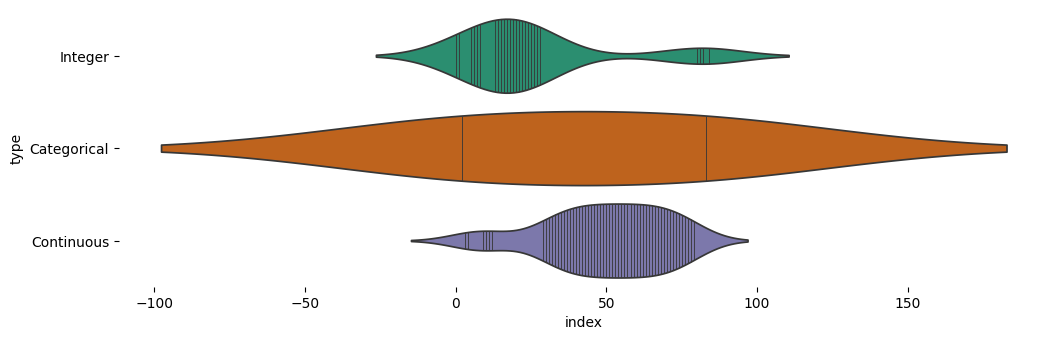

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns


figsize = (12, 1.2 * len(df_reset['type'].unique()))
plt.figure(figsize=figsize)

# Use 'index' column for x-axis
sns.violinplot(df_reset, x='index', y='type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.show()

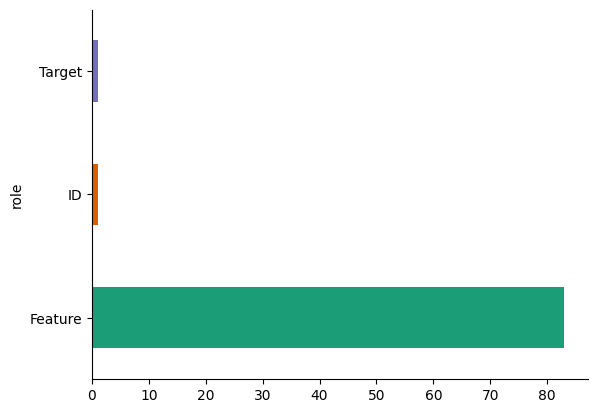

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df_reset.groupby('role').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

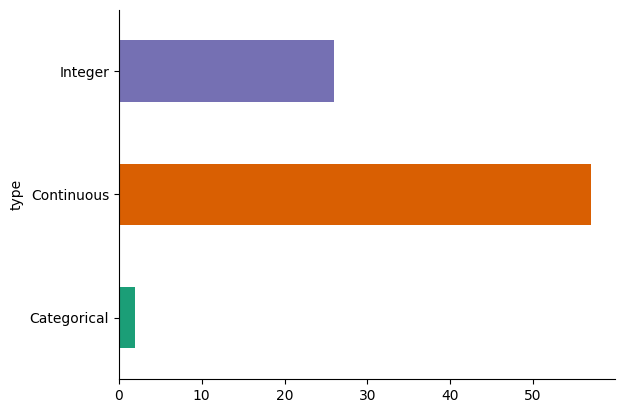

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df_reset.groupby('type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

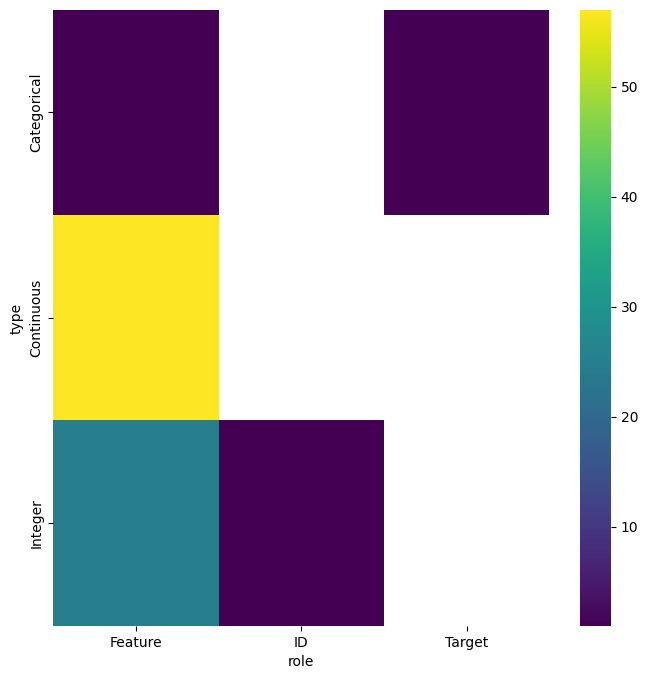

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['type'].value_counts()
    for x_label, grp in df_reset.groupby('role')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('role')
_ = plt.ylabel('type')

In [ ]:
print(X.head())
print(y.head())

# Get summary statistics
print(X.describe())

# Check for missing values
print(X.isnull().sum())

   id.orig_p  id.resp_p proto service  flow_duration  fwd_pkts_tot  \
0      38667       1883   tcp    mqtt      32.011598             9   
1      51143       1883   tcp    mqtt      31.883584             9   
2      44761       1883   tcp    mqtt      32.124053             9   
3      60893       1883   tcp    mqtt      31.961063             9   
4      51087       1883   tcp    mqtt      31.902362             9   

   bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  fwd_pkts_per_sec  ...  \
0             5                  3                  3          0.281148  ...   
1             5                  3                  3          0.282277  ...   
2             5                  3                  3          0.280164  ...   
3             5                  3                  3          0.281593  ...   
4             5                  3                  3          0.282111  ...   

    active.avg  active.std     idle.min     idle.max     idle.tot  \
0  2282414.913         0.0  2

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Identify non-numerical columns
non_numeric_cols = X_train.select_dtypes(exclude=['number']).columns

# Handle non-numerical columns (example: one-hot encoding)
X_train = pd.get_dummies(X_train, columns=non_numeric_cols)
X_test = pd.get_dummies(X_test, columns=non_numeric_cols)  # Apply same transformation to test set

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Model Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Model Accuracy: 0.9979423868312757
Classification Report:
                             precision    recall  f1-score   support

            ARP_poisioning       0.98      0.99      0.99      2306
            DDOS_Slowloris       0.99      0.97      0.98       154
             DOS_SYN_Hping       1.00      1.00      1.00     28409
              MQTT_Publish       1.00      1.00      1.00      1273
Metasploit_Brute_Force_SSH       1.00      0.64      0.78        11
             NMAP_FIN_SCAN       1.00      0.86      0.92         7
         NMAP_OS_DETECTION       1.00      1.00      1.00       622
             NMAP_TCP_scan       1.00      1.00      1.00       319
             NMAP_UDP_SCAN       0.99      0.99      0.99       750
       NMAP_XMAS_TREE_SCAN       1.00      0.99      1.00       582
               Thing_Speak       0.99      0.99      0.99      2424
                Wipro_bulb       0.99      0.94      0.96        79

                  accuracy               

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder


# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define the model
dl_model = Sequential()
dl_model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
dl_model.add(Dense(32, activation='relu'))
dl_model.add(Dense(1, activation='sigmoid'))  # Use 'softmax' if multiclass classification

# Compile the model
dl_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model using the encoded target variable
dl_model.fit(X_train, y_train_encoded, epochs=20, batch_size=32, validation_data=(X_test, y_test_encoded))

# Evaluate the model
loss, accuracy = dl_model.evaluate(X_test, y_test_encoded)
print("Deep Learning Model Accuracy:", accuracy)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2694/2694 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.0046 - loss: -128573.8281 - val_accuracy: 0.0042 - val_loss: -1764173.1250
Epoch 2/20
2694/2694 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.0046 - loss: -3306287.7500 - val_accuracy: 0.0042 - val_loss: -9847075.0000
Epoch 3/20
2694/2694 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0045 - loss: -13449734.0000 - val_accuracy: 0.0042 - val_loss: -26518258.0000
Epoch 4/20
2694/2694 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.0045 - loss: -32604338.0000 - val_accuracy: 0.0042 - val_loss: -53815036.0000
Epoch 5/20
2694/2694 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0041 - loss: -63108560.0000 - val_accuracy: 0.0042 - val_loss: -93960304.0000
Epoch 6/20
2694/2694 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.0048 - loss: -106582080.0000 - val_accuracy: 0.0042 - val_loss: -148787888.0000
Epoch 7/20
2694/2694 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.0044 - loss: -165869248.0000 - val_accuracy: 0.0042 - val_loss: -22005

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Model Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Convert y_test to a 1D array of labels if it's not already
if y_test.ndim != 1:
    y_test_1d = y_test.values.ravel()  # Convert to 1D NumPy array
else:
    y_test_1d = y_test

# Calculate ROC-AUC Score for multiclass
print("ROC-AUC Score:", roc_auc_score(y_test_1d, rf_model.predict_proba(X_test), multi_class='ovr'))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Model Accuracy: 0.9979423868312757
Classification Report:
                             precision    recall  f1-score   support

            ARP_poisioning       0.98      0.99      0.99      2306
            DDOS_Slowloris       0.99      0.97      0.98       154
             DOS_SYN_Hping       1.00      1.00      1.00     28409
              MQTT_Publish       1.00      1.00      1.00      1273
Metasploit_Brute_Force_SSH       1.00      0.64      0.78        11
             NMAP_FIN_SCAN       1.00      0.86      0.92         7
         NMAP_OS_DETECTION       1.00      1.00      1.00       622
             NMAP_TCP_scan       1.00      1.00      1.00       319
             NMAP_UDP_SCAN       0.99      0.99      0.99       750
       NMAP_XMAS_TREE_SCAN       1.00      0.99      1.00       582
               Thing_Speak       0.99      0.99      0.99      2424
                Wipro_bulb       0.99      0.94      0.96        79

                  accuracy               

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score
import numpy as np

# Convert y_train and y_test to numpy arrays and reshape
y_train_np = np.array(y_train).reshape(-1, 1)
y_test_np = np.array(y_test).reshape(-1, 1)

# Encode the target variable to one-hot encoding
onehot_encoder = OneHotEncoder(sparse=False)
y_train_encoded = onehot_encoder.fit_transform(y_train_np)
y_test_encoded = onehot_encoder.transform(y_test_np)

# Define the deep learning model
dl_model = Sequential()
dl_model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
dl_model.add(Dropout(0.5))  # Add dropout for regularization
dl_model.add(Dense(64, activation='relu'))
dl_model.add(Dense(32, activation='relu'))
dl_model.add(Dense(y_train_encoded.shape[1], activation='softmax'))  # Multiclass classification

# Compile the model
dl_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using the one-hot encoded target variable
dl_model.fit(X_train, y_train_encoded, epochs=20, batch_size=64, validation_data=(X_test, y_test_encoded))

# Evaluate the model
loss, accuracy = dl_model.evaluate(X_test, y_test_encoded)
y_pred_dl = dl_model.predict(X_test)

# Compute ROC-AUC Score
print("Deep Learning Model Accuracy:", accuracy)
print("ROC-AUC Score:", roc_auc_score(y_test_encoded, y_pred_dl, multi_class='ovr'))  # Use one-hot encoded y_test for ROC-AUC


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1347/1347 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9152 - loss: 0.3168 - val_accuracy: 0.9860 - val_loss: 0.0509
Epoch 2/20
1347/1347 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9837 - loss: 0.0581 - val_accuracy: 0.9889 - val_loss: 0.0426
Epoch 3/20
1347/1347 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9880 - loss: 0.0397 - val_accuracy: 0.9909 - val_loss: 0.0322
Epoch 4/20
1347/1347 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9895 - loss: 0.0333 - val_accuracy: 0.9920 - val_loss: 0.0285
Epoch 5/20
1347/1347 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9917 - loss: 0.0278 - val_accuracy: 0.9925 - val_loss: 0.0251
Epoch 6/20
1347/1347 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9911 - loss: 0.0319 - val_accuracy: 0.9924 - val_loss: 0.0252
Epoch 7/20
1347/1347 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9920 - loss: 0.0272 - val_accuracy: 0.9930 - val_loss: 0.0225
Epoch 8/20
1347/1347 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9923 - loss: 0.0250 - val_accurac

Decision Tree Model Accuracy: 0.9974550573965779
Classification Report:
                             precision    recall  f1-score   support

            ARP_poisioning       0.98      0.99      0.99      2306
            DDOS_Slowloris       0.99      0.99      0.99       154
             DOS_SYN_Hping       1.00      1.00      1.00     28409
              MQTT_Publish       1.00      1.00      1.00      1273
Metasploit_Brute_Force_SSH       0.89      0.73      0.80        11
             NMAP_FIN_SCAN       0.86      0.86      0.86         7
         NMAP_OS_DETECTION       1.00      1.00      1.00       622
             NMAP_TCP_scan       1.00      1.00      1.00       319
             NMAP_UDP_SCAN       0.99      0.99      0.99       750
       NMAP_XMAS_TREE_SCAN       1.00      0.99      1.00       582
               Thing_Speak       0.99      0.98      0.99      2424
                Wipro_bulb       0.95      0.94      0.94        79

                  accuracy               

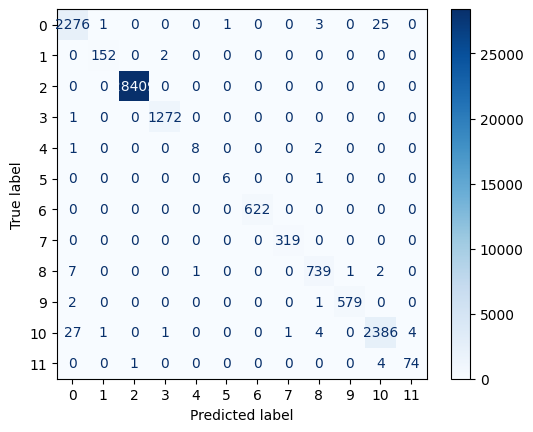

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Import necessary functions
import matplotlib.pyplot as plt

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree Model Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

# Extract the labels from the DataFrame as a 1D array
y_test_array = y_test.values.ravel()

# Set multi_class to 'ovr' for One-vs-Rest approach
print("Decision Tree ROC-AUC Score:", roc_auc_score(y_test_array, dt_model.predict_proba(X_test), multi_class='ovr'))

# Generate confusion matrix and plot it
cm = confusion_matrix(y_test, y_pred_dt) # Generate confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm) # Create display object
disp.plot(cmap=plt.cm.Blues) # Plot confusion matrix
plt.show()